## Setup:

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Setup Route to your proyect directory 
os.chdir("/media/roovedot/common/VSrootWorkspace/House-Price-Predictions-with-Random-Forest-Regression-Model")

housing = pd.read_csv('data/train_catH_naH.csv')
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1460 non-null   int64  
 1   Id                    1460 non-null   int64  
 2   MSSubClass            1460 non-null   int64  
 3   LotFrontage           1460 non-null   float64
 4   LotArea               1460 non-null   int64  
 5   OverallQual           1460 non-null   int64  
 6   OverallCond           1460 non-null   int64  
 7   YearBuilt             1460 non-null   int64  
 8   YearRemodAdd          1460 non-null   int64  
 9   MasVnrArea            1460 non-null   float64
 10  BsmtFinSF1            1460 non-null   int64  
 11  BsmtFinSF2            1460 non-null   int64  
 12  BsmtUnfSF             1460 non-null   int64  
 13  TotalBsmtSF           1460 non-null   int64  
 14  1stFlrSF              1460 non-null   int64  
 15  2ndFlrSF             

## Boxplots for every Variable:

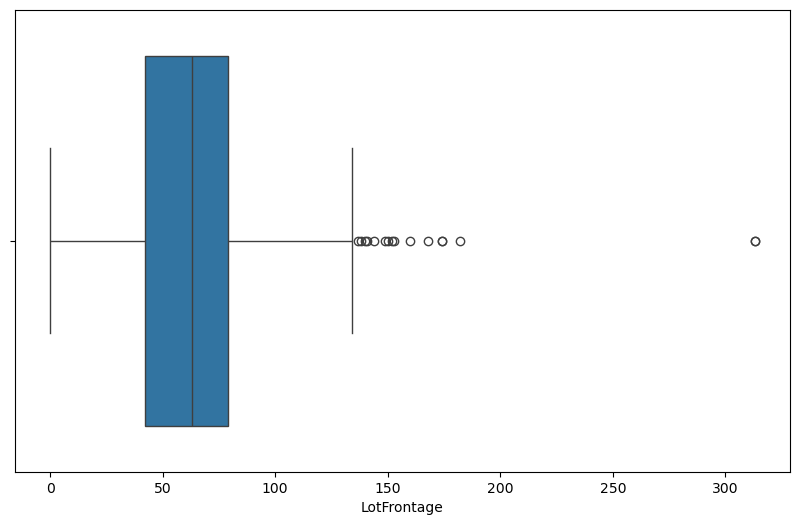

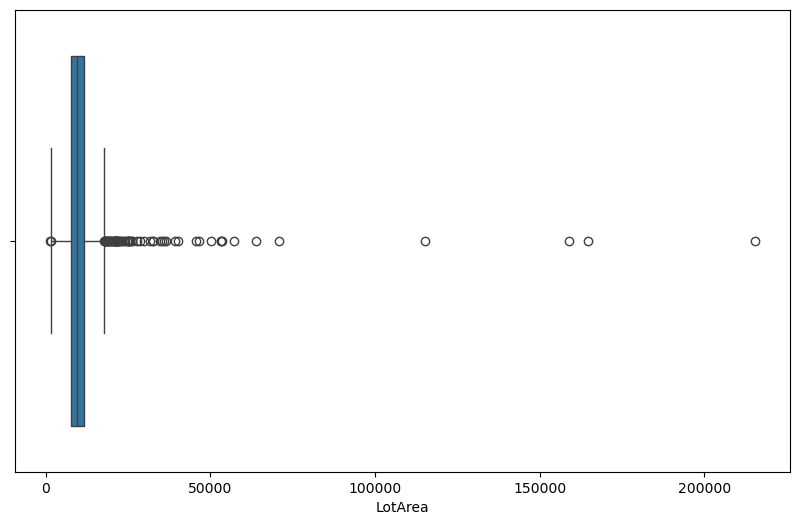

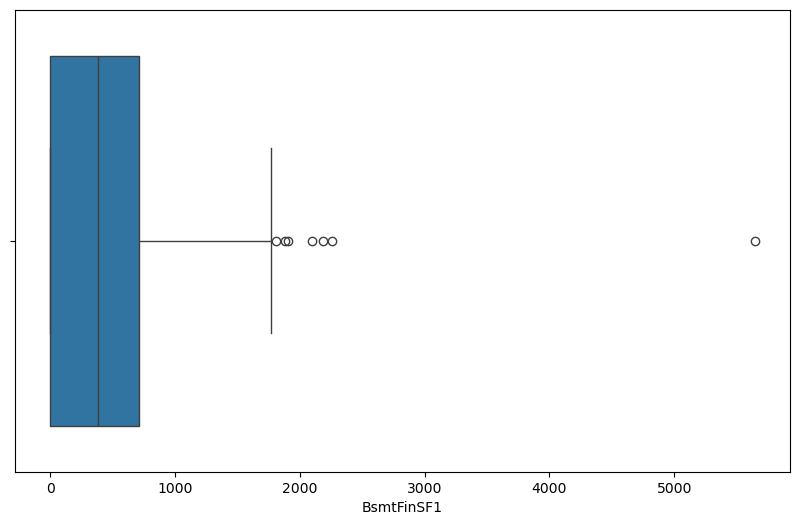

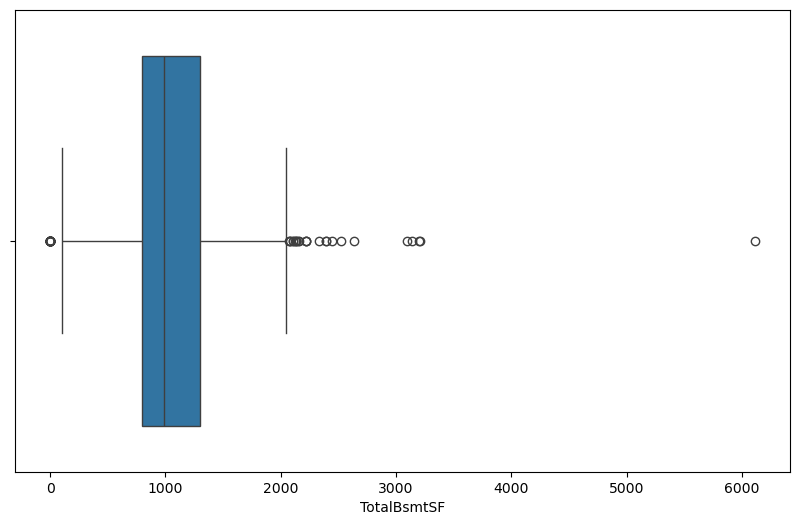

In [4]:

columns_to_plot = ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'TotalBsmtSF']

for column in columns_to_plot:

    plt.figure(figsize=(10, 6)) # Create new figure for each Feature

    sns.boxplot(x=housing[column]) # Plot the Feature

    plt.show() # Print Plot

## Lot-Related Outliers: (Relation to SalePrice)

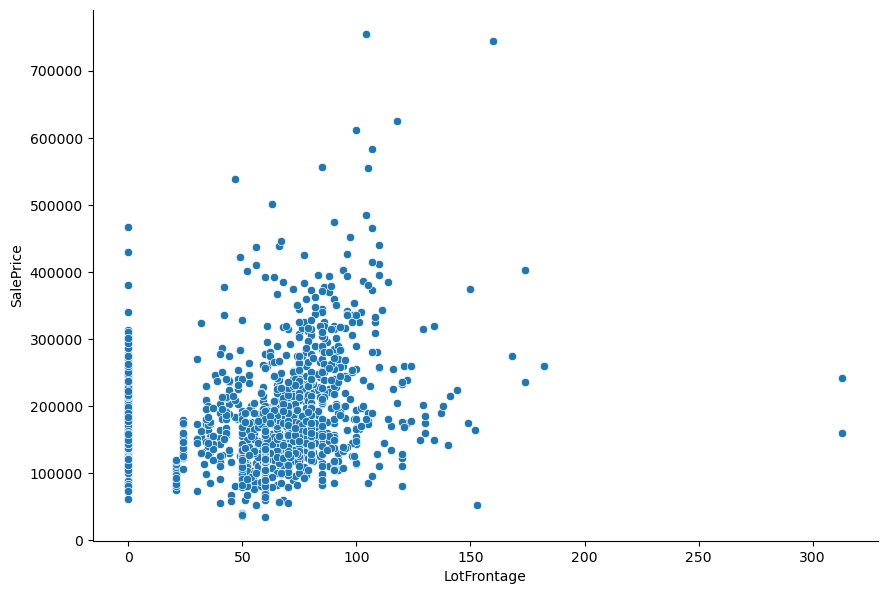

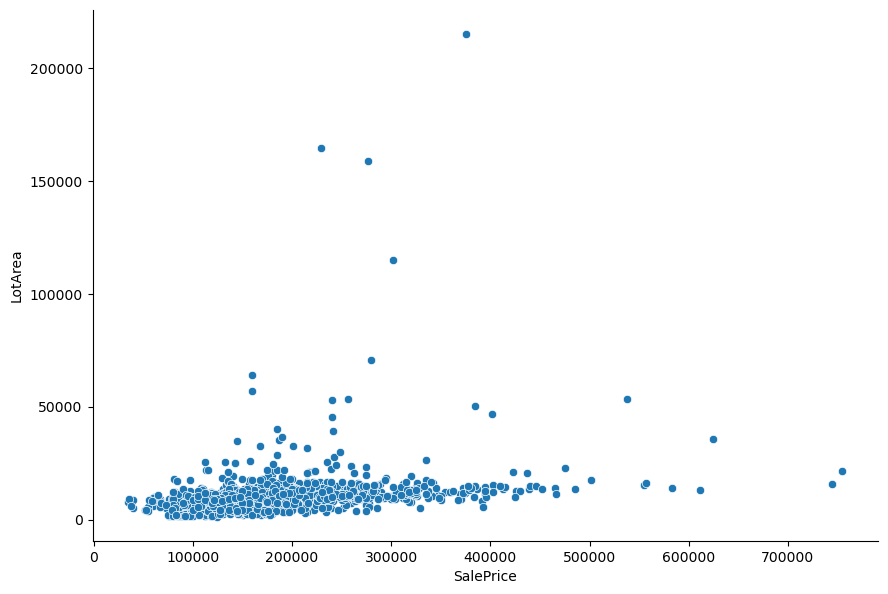

In [5]:
sns.pairplot(housing, x_vars=["LotFrontage"], y_vars=["SalePrice"], height=6, aspect=1.5)
sns.pairplot(housing, x_vars=["SalePrice"], y_vars=["LotArea"], height=6, aspect=1.5)

In [6]:
# Select the 4 rows with biggest LotArea
top_lot_area = housing.sort_values(by='LotArea', ascending=False).head(4)

# Print the index and 'LotArea' values of the top 4 observations
for index, row in top_lot_area.iterrows():
    print(f'Dropping index {index}, LotArea {row["LotArea"]}')

Dropping index 313, LotArea 215245.0
Dropping index 335, LotArea 164660.0
Dropping index 249, LotArea 159000.0
Dropping index 706, LotArea 115149.0


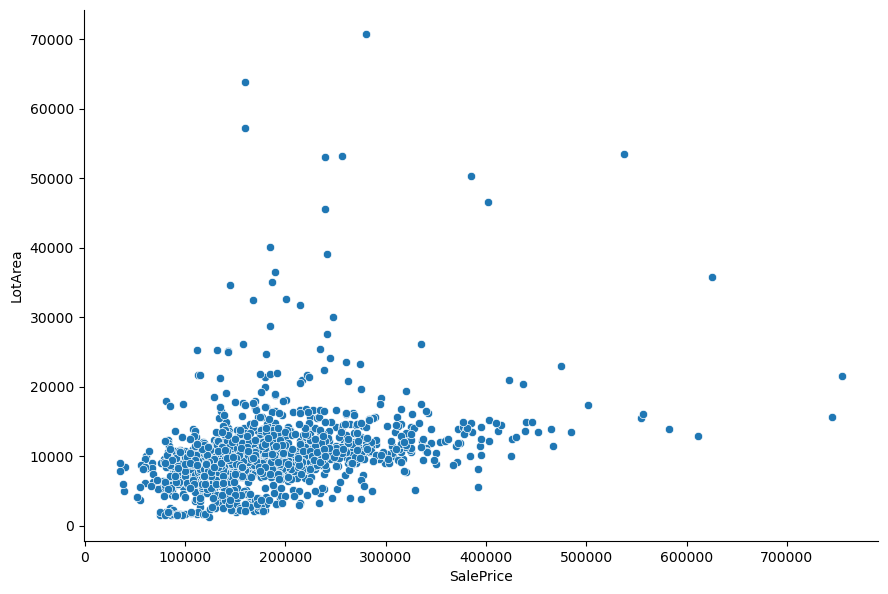

In [7]:
housing.drop(index=top_lot_area.index, inplace=True)

sns.pairplot(housing, x_vars=["SalePrice"], y_vars=["LotArea"], height=6, aspect=1.5)

In [8]:
# Select the 2 rows with biggest LotFrontage
top_lot_frontage = housing.sort_values(by='LotFrontage', ascending=False).head(2)

# Print the index and 'LotArea' values of the top 5 observations
for index, row in top_lot_frontage.iterrows():
    print(f'Dropping index {index}, LotFrontage {row["LotFrontage"]}')

Dropping index 934, LotFrontage 313.0
Dropping index 1298, LotFrontage 313.0


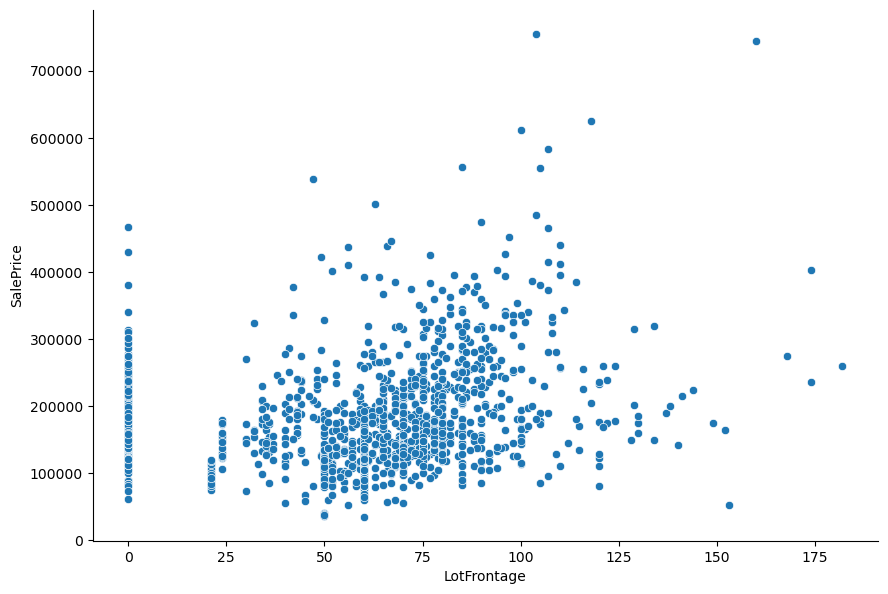

In [9]:
housing.drop(index=top_lot_frontage.index, inplace=True)

sns.pairplot(housing, x_vars=["LotFrontage"], y_vars=["SalePrice"], height=6, aspect=1.5)

## Check Boxplots for every Variable:

In [ ]:
for column in housing.columns:

    plt.figure(figsize=(10, 6)) # Create new figure for each Feature

    sns.boxplot(x=housing[column]) # Plot the Feature

    plt.show() # Print Plot

## Update on the data:

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1454 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1454 non-null   int64  
 1   Id                    1454 non-null   int64  
 2   MSSubClass            1454 non-null   int64  
 3   LotFrontage           1454 non-null   float64
 4   LotArea               1454 non-null   int64  
 5   OverallQual           1454 non-null   int64  
 6   OverallCond           1454 non-null   int64  
 7   YearBuilt             1454 non-null   int64  
 8   YearRemodAdd          1454 non-null   int64  
 9   MasVnrArea            1454 non-null   float64
 10  BsmtFinSF1            1454 non-null   int64  
 11  BsmtFinSF2            1454 non-null   int64  
 12  BsmtUnfSF             1454 non-null   int64  
 13  TotalBsmtSF           1454 non-null   int64  
 14  1stFlrSF              1454 non-null   int64  
 15  2ndFlrSF              1454

In [ ]:
# Get each Feature's correlation with 'SalePrice'
housing_corr = housing.corr()['SalePrice'].sort_values(ascending=False)  # Ordenar de mayor a menor

# Print all correlations in order
for var, corr in housing_corr.items():
    print(f"{var}: {corr:.3f}") # corr:.2f formats corr values to 2 decimals

## Save file for Next Step:

In [ ]:
housing.info()

In [16]:
housing.to_csv('data/train_catH_naH_outlH.csv')